In [1]:
import os
import re
from pathlib import Path
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import shutil

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)       

In [8]:
"""Get the width and height of the terminal window.
"""

width, height = shutil.get_terminal_size((80, 20))

"""
    :param work_dir (str) : Current working directory
    :param main_dir (str) : Always be set to ./SuperBone_ver1
    :param output_dir (str) : The default directory where all outputs are stored
"""  

work_dir = os.getcwd()
main_dir = os.path.dirname(work_dir)
initial_dir = os.path.join(os.path.dirname(main_dir),'img_src_all')   
output_dir = os.path.join(main_dir,'analyze_figure')

import FileChooser

"""Initialize the class and set the initial directory, file type, and the type of file/folder to choose

    :param initial_dir (str) : Initial directory to open the file dialog
    :param file_type (str) : The type of file to select (e.g. "Image", "DICOM",...)
    :param choose_type (str) : The type of file/folder to select ("File", "Folder", "Multiple Files")
"""  

selector = FileChooser.Selector(initial_dir, file_type = "PNG", choose_type = "Folder")

"""Open a file dialog windows and return the source path

    :param file_src_path (str) : The absolute path of the source image
"""

dir_src_path = selector.run()

Import Folder : C:/Users/marsh/OneDrive/桌面/img_src_all


In [ ]:
search_csv_path = os.path.join(main_dir,'search_output.csv')
search_csv = pd.read_csv(search_csv_path,sep=',')
search_filter = search_csv.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12]]

In [9]:
name_dict = {'Patient Name':[], 'Scan Options':[]}
for file in os.listdir(dir_src_path):
    regex = re.compile(r'\w_(.+)_ID.+')
    match = regex.search(file)
    name_dict['Patient Name'].append(match.group(1))
    name_dict['Scan Options'].append('AXIAL MODE')
    
file_info = pd.DataFrame(name_dict)
file_info_groupby = file_info.groupby(['Patient Name', 'Scan Options'])
file_info_groupby_num = file_info_groupby.size().reset_index(name='Number of Section Images')
print(file_info_groupby_num['Number of Section Images'].astype(int).sum())
display(file_info_groupby_num)

new_csv_path = os.path.join(main_dir,'search_output_done.csv')
file_info_groupby_num.to_csv(new_csv_path,sep=',',index=0)

239783


,Patient Name,Scan Options,Number of Section Images
0,ALCES_RADIUS_ULNA,AXIAL MODE,66
1,Antilope_cervicapra_femur,AXIAL MODE,790
2,Antilope_cervicapra_humerus,AXIAL MODE,143
3,Antilope_cervicapra_tibia,AXIAL MODE,390
4,CASUARIUS_FEMUR,AXIAL MODE,21534
5,CASUARIUS_TBT,AXIAL MODE,561
6,CASUARIUS_TMT,AXIAL MODE,7678
7,CERVUSE_FEMUR,AXIAL MODE,6695
8,CERVUSE_HUMERUS,AXIAL MODE,5435
9,CERVUSE_METACARPUS,AXIAL MODE,2253


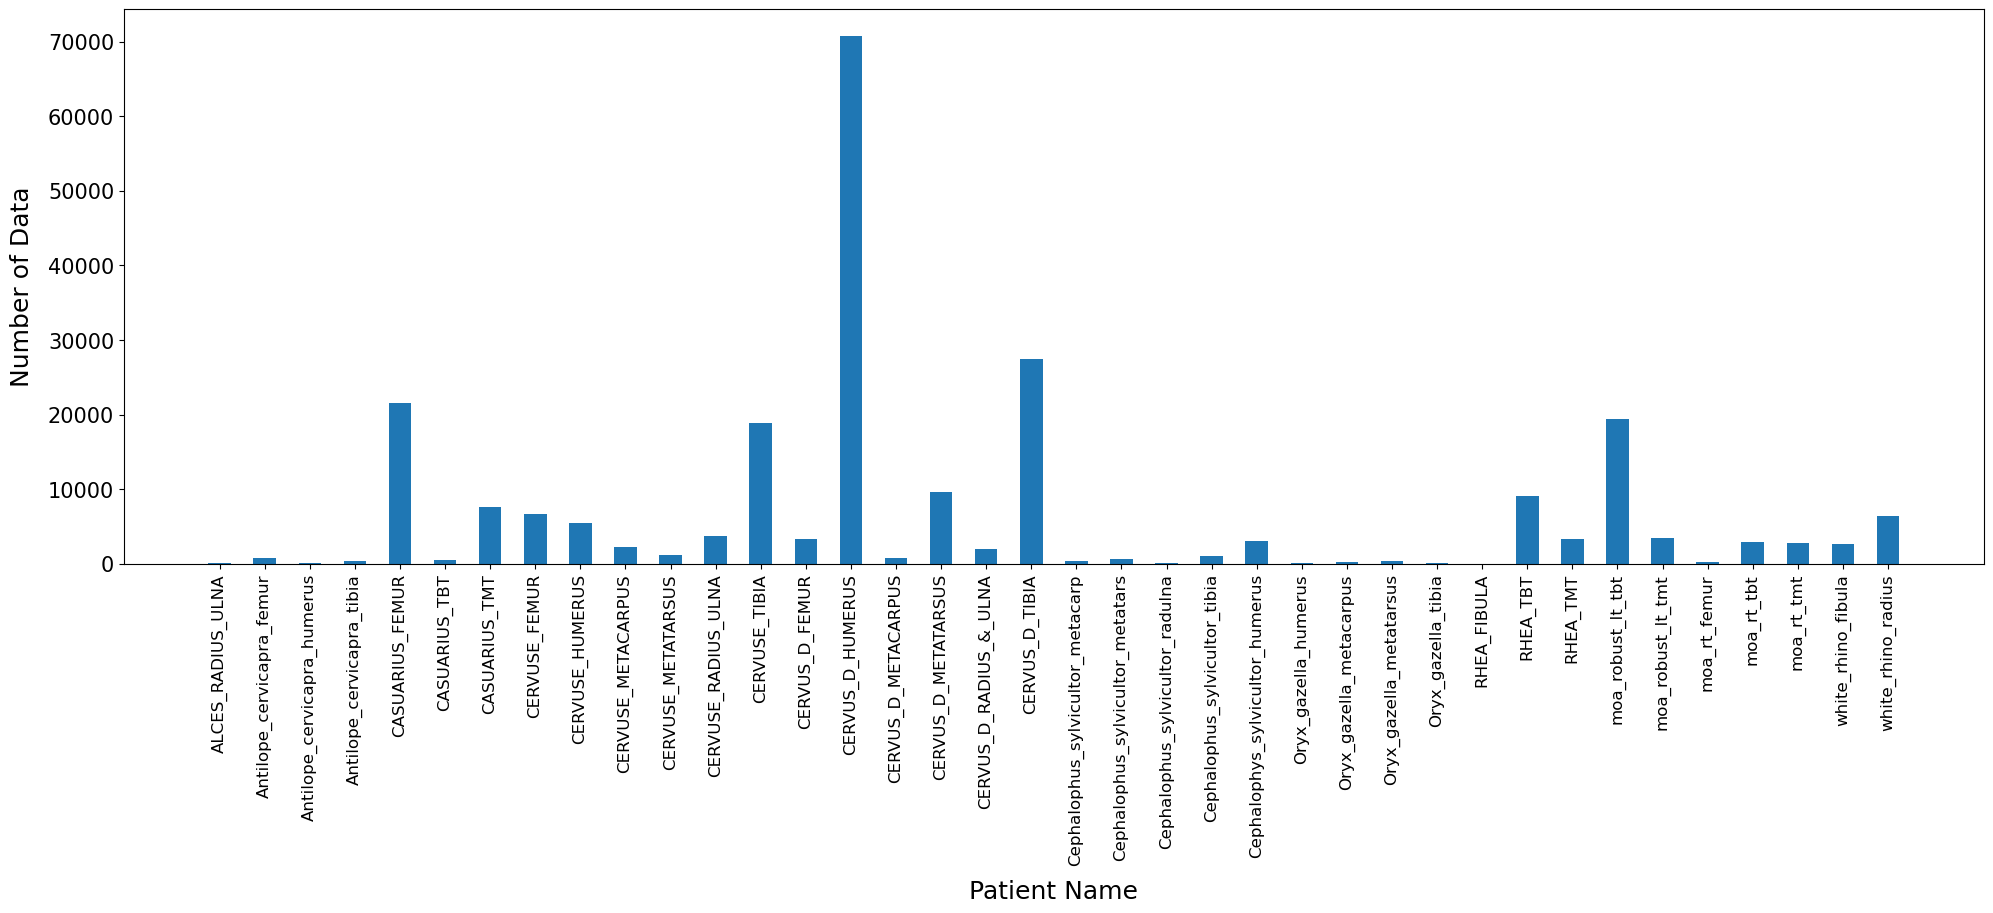

In [13]:
fig, ax = plt.subplots(figsize=plt.figaspect(0.3)*1.5)
plt.bar(file_info_groupby_num['Patient Name'], file_info_groupby_num['Number of Section Images'], width=0.5) 

plt.xlabel('Patient Name',fontsize=18,labelpad=10)
plt.ylabel('Number of Data',fontsize=18,labelpad=10)

plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=15)

save_path = os.path.join(output_dir, 'Number_of_Data_bar.png')
plt.savefig(save_path,bbox_inches='tight',facecolor = 'white',dpi=100)

In [ ]:
name_dict = {'Patient Name':[]}
for file in os.listdir(dir_src_path):
    regex = re.compile(r'\w_(.+)_ID.+')
    match = regex.search(file)
    name_dict['Patient Name'].append(match.group(1))
    
file_info = pd.DataFrame(name_dict)
file_info_groupby = file_info.groupby(['Patient Name'])
file_info_groupby_num = file_info_groupby.size().reset_index(name='Number of Section Images')
print(file_info_groupby_num['Number of Section Images'].astype(int).sum())
# display(file_info_groupby_num)

merge_df = pd.merge(left=search_filter,right=file_info_groupby_num, on="Patient Name", how="outer")
merge_df = merge_df.fillna(0)
columnsTitles = ['Class',
                 'Order',
                 'Family',
                 'Genus-Species',
                 'Part',
                 'Patient Name', 
                 'Image Type',
                 'Scan Options', 
                 'Pixel Spacing (mm)',
                 'Number of DICOM Files',
                 'Size of All DICOM Files (MB)',
                 'Number of Section Images',
                 'File Path in ZIP'
                ]
merge_df = merge_df.reindex(columns=columnsTitles) 
# display(merge_df[merge_df['Scan Options']=='AXIAL MODE'])
print(merge_df['Number of Section Images'].astype(int).sum())

merge_df.to_csv(search_csv_path,sep=',',index=0)